### Perform EDA on Black Friday Sales

## Problem Statement

 A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [238]:
df = pd.read_csv('Black_Friday/train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [184]:
# Basic 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [185]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [239]:
df.drop(['User_ID'],axis = 1,inplace=True)
df.drop(['Product_ID'],axis = 1,inplace=True)

# Preprocessing

### Now here we handle categorical data :-

In [240]:
# Gender
df['Gender']= df['Gender'].map({'F':0,'M':1})
df.head(2)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,0,0-17,10,A,2,0,1,6.0,14.0,15200


In [188]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [241]:
# Age
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head(2)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370
1,0,1,10,A,2,0,1,6.0,14.0,15200


from sklearn import preprocessing

lable_encoder = preprocessing.LabelEncoder()
df['Age'] = lable_encoder.fit_transform(df['Age'])
df['Age'].unique()

In [190]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [242]:
# City_Category

df_city = pd.get_dummies(df['City_Category'],drop_first=True)
df_city.head(5)

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [244]:
df = pd.concat([df,df_city],axis=1)

In [243]:
df.head(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370
1,0,1,10,A,2,0,1,6.0,14.0,15200
2,0,1,10,A,2,0,12,NaN,NaN,1422
3,0,1,10,A,2,0,12,14.0,NaN,1057
4,1,7,16,C,4+,0,8,NaN,NaN,7969


In [245]:
df.drop('City_Category',axis=1,inplace=True)

In [246]:
# Stay_In_Current_City_Years
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [247]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   Stay_In_Current_City_Years  550068 non-null  object 
 4   Marital_Status              550068 non-null  int64  
 5   Product_Category_1          550068 non-null  int64  
 6   Product_Category_2          376430 non-null  float64
 7   Product_Category_3          166821 non-null  float64
 8   Purchase                    550068 non-null  int64  
 9   B                           550068 non-null  bool   
 10  C                           550068 non-null  bool   
dtypes: bool(2), float64(2), int64(6), object(1)
memory usage: 38.8+ MB


### Missing Values

In [251]:
df.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
B                             0
C                             0
dtype: int64

In [250]:
## Replace the missing values with mode

df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [252]:
df['Product_Category_3'].mode()

0    16.0
Name: Product_Category_3, dtype: float64

In [253]:
# convert an object into int

df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df['Product_Category_2'] = df['Product_Category_2'].astype(int)
df['Product_Category_3'] = df['Product_Category_3'].astype(int)
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

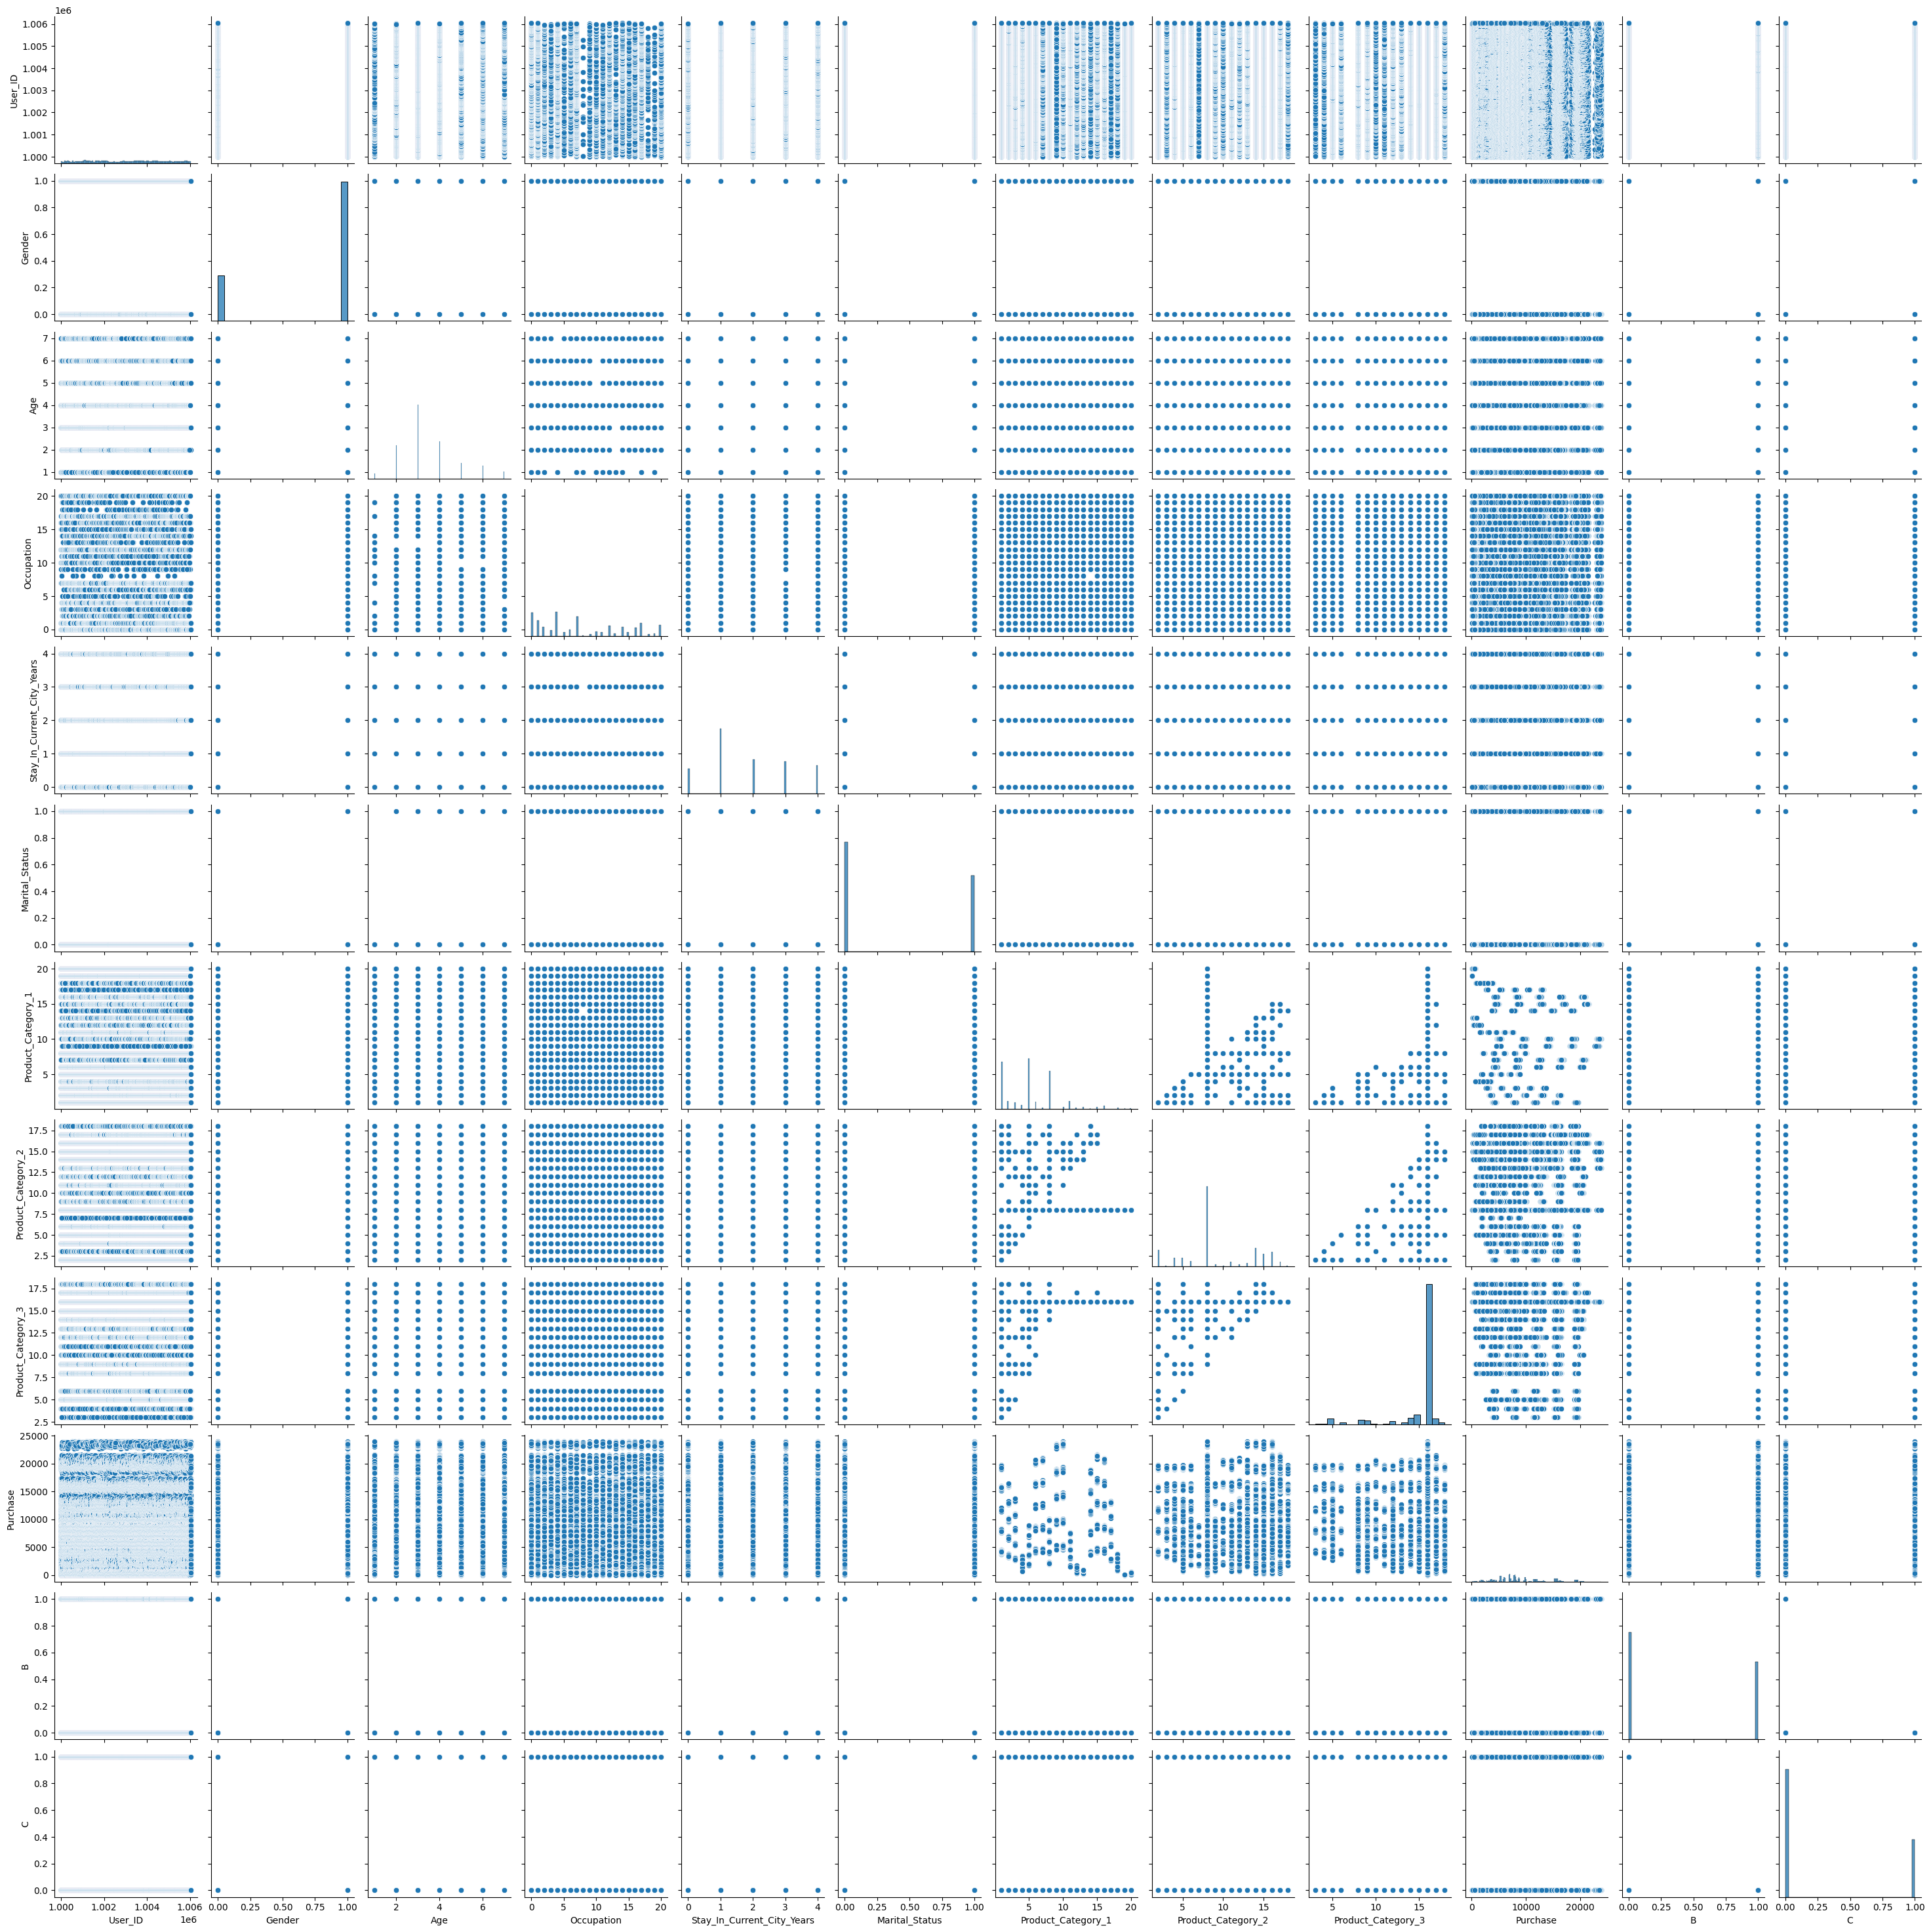

In [202]:
# Visulize the data

sns.pairplot(df)

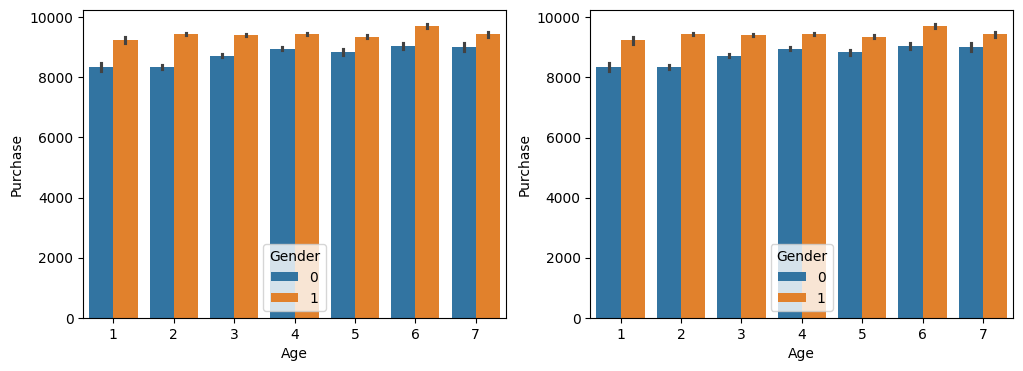

In [203]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.barplot(x='Age',y='Purchase',data=df,hue='Gender')

plt.subplot(122)
sns.barplot(x='Age',y='Purchase',data=df,hue='Gender')
plt.show()

 Observation: Purchasing of Men are higher than women

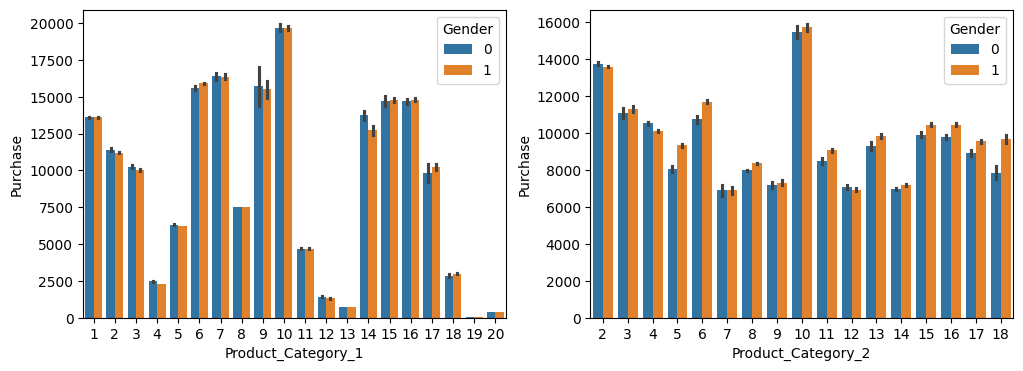

In [204]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.barplot(x='Product_Category_1',y='Purchase',data=df,hue='Gender')

plt.subplot(122)
sns.barplot(x='Product_Category_2',y='Purchase',data=df,hue='Gender')
plt.show()

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

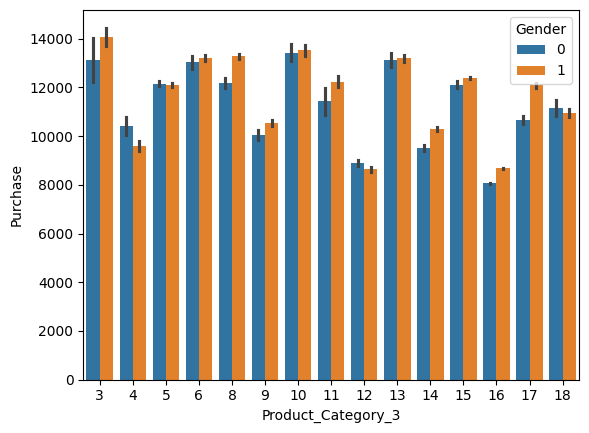

In [205]:
sns.barplot(x='Product_Category_3',y='Purchase',data=df,hue='Gender')

# Feature Scaling

In [254]:
from sklearn.model_selection import train_test_split
X = df.drop('Purchase',axis=1)
y = df['Purchase']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=32)

In [255]:
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,8,16,0,0
1,0,1,10,2,0,1,6,14,0,0
2,0,1,10,2,0,12,8,16,0,0
3,0,1,10,2,0,12,14,16,0,0
4,1,7,16,4,0,8,8,16,0,1


In [257]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)